waste.ipynb

Author: UFO Software, LLC
Created: Wednesday, February 14, 2021 13:02

License GPLv3+: GNU GPL version 3 or later https://gnu.org/licenses/gpl.html 
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Reads in the Batches_0.csv file from the December 2020 WA State Traceability Data and displays cannabis waste per producer per day by plant stage.

In [13]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# replace with your path to the data
file_path = Path('../dec-2020')
pd.set_option('display.max_columns', None)

In [14]:
def get_batches_df():
    
    # define column dtypes to reduce memory footprint
    col_dtypes = {'global_id': 'string',
                 'mme_id': 'string',
                 'user_id': 'string',
                 'external_id': 'string',
                 'uom': 'category',
                 #'planted_at': 'string', depreciated
                 #'created_by_mme_id', 'string', Every entry is nan
                 'num_plants': 'int32',
                 'status': 'category',
                 'strain_id': 'string',
                 'is_parent_batch': 'bool',
                 'is_child_batch': 'bool',
                 'type': 'category',
                 'harvest_stage': 'category',
                 #'qty_accumulated_waste': 'float32', depreciated
                 'qty_packaged_flower': 'float32',
                 'qty_packaged_by_product': 'float32',
                 'area_id': 'string',
                 'origin': 'category',
                 #'qty_cure': 'float32' depreciated
                 'plant_stage': 'category',
                 'flower_dry_weight': 'float32',
                 'waste': 'float32',
                 'other_dry_weight': 'float32',
                 'flower_wet_weight': 'float32',
                 'other_wet_weight': 'float32'}

    # parse date columns
    date_cols = ['created_at',
                 'updated_at',
                 #'planted_at', depreciated
                 'harvested_at',
                 'batch_created_at',
                 'packaged_completed_at',
                 'deleted_at',
                 'harvested_end_at']
    
    # define columns to load to reduce memory footprint by only loading the columns needed
    cols = list(col_dtypes.keys()) + date_cols

    batches_df = pd.read_csv(file_path / 'Batches_0.csv', sep = '\t', encoding = 'utf-16', usecols = cols, dtype = col_dtypes, parse_dates = date_cols)
    
    return batches_df

In [15]:
# read the data into a dataframe
batches_df = get_batches_df()
batches_df.head()

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
0,WAJ412598.BA1,2018-01-31 17:24:31,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,4125980000004911,ea,1900-01-01,2018-01-31 17:24:31,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.0,0.0,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0
1,WAJ412598.BA2,2018-01-31 17:24:32,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,4125980000004921,ea,1900-01-01,2018-01-31 17:24:32,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.0,0.0,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0
2,WAJ412598.BA3,2018-01-31 17:24:30,2018-01-31 17:24:30,WAWA1.MMDJ,WAWA1.USAM,4125980000005382,ea,1900-01-01,2018-01-31 17:24:30,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.0,0.0,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0
3,WAJ412598.BA4,2018-01-31 17:24:35,2018-01-31 17:24:35,WAWA1.MMDJ,WAWA1.USAM,4125980000005399,ea,1900-01-01,2018-01-31 17:24:35,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.0,0.0,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0
4,WAJ412598.BA5,2018-01-31 17:24:32,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,4125980000005409,ea,1900-01-01,2018-01-31 17:24:32,0,open,WAJ412598.STX,False,False,propagation material,NaN,0.0,0.0,1900-01-01,WAJ412598.AR3,clone,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0


In [16]:
batches_df.tail()

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
37646467,WAJ416113.BAMF89H,2021-01-06 05:38:56,2021-01-06 05:38:58,WAWA1.MM1F4,WAWA1.US205,<NA>,ea,1900-01-01,2021-01-06 05:38:56,1,open,WAJ416113.STO1DS,True,False,plant,NaN,0.0,0.0,1900-01-01 00:00:00,WAJ416113.AR5XU7,plant,growing,NaT,0.0,0.0,0.0,NaT,0.0,0.0
37646468,WAJ416113.BAMF89I,2021-01-06 05:38:57,2021-01-06 05:38:59,WAWA1.MM1F4,WAWA1.US205,<NA>,ea,1900-01-01,2021-01-06 05:38:57,1,open,WAJ416113.ST1L6,True,False,plant,NaN,0.0,0.0,1900-01-01 00:00:00,WAJ416113.AR5XU7,plant,growing,NaT,0.0,0.0,0.0,NaT,0.0,0.0
37646469,WAJ412130.BAMF89J,2021-01-06 05:38:57,2021-01-06 05:38:57,WAWA1.MMHO,WAWA1.USF0,4121300000011549,ea,1900-01-01,2021-01-06 05:38:57,0,open,WAJ412130.STIHA7,False,False,intermediate/ end product,NaN,0.0,0.0,2021-01-05 16:00:00,WAJ412130.AR4C5K,NaN,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0
37646470,WAJ417150.BAMF89K,2021-01-06 05:38:57,2021-01-06 05:38:57,WAWA1.MMXN,WAWA1.US2B5,IN_CONV2_WAJ417150.INSOT2R,gm,1900-01-01,2021-01-06 05:38:57,0,open,WAJ417150.STNP01,False,True,intermediate/ end product,NaN,0.0,0.0,2021-01-05 16:00:00,WAJ417150.AR2456,NaN,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0
37646471,WAJ412130.BAMF89L,2021-01-06 05:38:58,2021-01-06 05:38:58,WAWA1.MMHO,WAWA1.USF0,4121300000011550,ea,1900-01-01,2021-01-06 05:38:58,0,open,WAJ412130.STIHA7,False,False,intermediate/ end product,NaN,0.0,0.0,2021-01-05 16:00:00,WAJ412130.AR4C5K,NaN,seedling,NaT,0.0,0.0,0.0,NaT,0.0,0.0


Overview of the data to see if anything stands out.
Every numeric column has negative values so those also need to be addressed.

In [17]:
batches_df.describe()

,num_plants,qty_packaged_flower,qty_packaged_by_product,flower_dry_weight,waste,other_dry_weight,flower_wet_weight,other_wet_weight
count,3.764647e+07,3.764647e+07,3.764647e+07,3.764647e+07,3.764647e+07,3.764647e+07,3.764647e+07,3.764647e+07
mean,2.507006e+00,4.254860e+02,3.446942e+02,2.078160e+02,1.926857e+02,5.153087e+01,2.256291e+03,1.607805e+02
std,2.889761e+02,1.450842e+05,6.095849e+03,1.711299e+04,1.003224e+04,2.002182e+03,7.406010e+04,2.985875e+04
min,-1.169767e+06,-6.546024e+08,-1.555000e+02,-1.000000e+00,-1.130000e+03,-2.604970e+04,-1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.002000e+05,2.388506e+07,4.000000e+06,9.008434e+07,2.543879e+07,1.176496e+06,2.481325e+08,4.043306e+07


In [18]:
batches_df.type.unique()

['propagation material', 'plant', 'intermediate/ end product', 'harvest', NaN, 'waste']
Categories (5, object): ['propagation material', 'plant', 'intermediate/ end product', 'harvest', 'waste']

In [19]:
#There are no Nan entries in the waste column
batches_df.waste.isna().unique()

array([False])

In [21]:
# find all the entries where the waste value is less than zero
batches_df[batches_df.waste < 0]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
117141,WAJ412146.BA2IDY,2018-02-01 13:53:57,2019-06-04 07:32:29,WAWA1.MM7Q,WAWA1.USZR,<NA>,ea,2017-10-07 10:20:00,1900-01-01 00:00:00,0,closed,WAJ412146.STMJ4,False,False,harvest,finished,0.0,0.0,1900-01-01,WAJ412146.AR697,plant,harvested,NaT,0.0,-1130.0,7950.0,2017-10-07 10:20:00,14720.0,0.0
8286602,WAJ416958.BA4XONH,2018-03-28 15:00:00,2018-03-28 15:00:00,WAWA1.MMOM,WAWA1.US1S3,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,WAJ416958.ST64SL,False,False,harvest,finished,0.0,0.0,1900-01-01,WAJ416958.AR1M5L,seed,seedling,NaT,2267.0,-1.0,0.0,2017-11-23 13:59:00,0.0,0.0
8756360,WAJ412815.BA57RJH,2018-04-13 05:09:45,2018-04-13 05:09:45,WAWA1.MMAH,WAWA1.US7I,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,WAJ412815.ST42P7,False,False,harvest,finished,0.0,0.0,1900-01-01,WAJ412815.AR10FM,seed,seedling,NaT,2267.0,-1.0,0.0,2017-11-23 13:59:00,0.0,0.0
8858990,WAL7.BA59YSX,2018-04-17 09:37:52,2018-04-17 09:37:52,WAWA1.MM1L8,WAWA1.US386,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,<NA>,False,False,harvest,finished,0.0,0.0,1900-01-01,WAL7.AR1FLY,seed,seedling,NaT,2267.0,-1.0,0.0,2017-11-23 13:59:00,0.0,0.0
9606937,WAJ416502.BA5Q03W,2018-05-17 03:03:03,2018-05-21 06:57:06,WAWA1.MMIX,WAWA1.USGG,<NA>,gm,2017-11-22 16:00:00,2018-03-28 15:00:00,0,open,WAJ416502.ST574,True,False,harvest,finished,0.0,0.0,1900-01-01,WAJ416502.AR1MNW,seed,seedling,NaT,2267.0,-1.0,0.0,2017-11-23 13:59:00,0.0,0.0


In [22]:
# change these to a postitive value by multiplying by -1
batches_df.loc[(batches_df.waste < 0), 'waste'] = batches_df.loc[(batches_df.waste < 0), 'waste'] * -1.0

In [23]:
batches_df[batches_df.waste < 0]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight


In [20]:
# What are the plant stages?
batches_df.plant_stage.unique()

['seedling', NaN, 'growing', 'flower', 'harvested', 'clone', 'transferred', 'packaged', 'destroyed']
Categories (8, object): ['seedling', 'growing', 'flower', 'harvested', 'clone', 'transferred', 'packaged', 'destroyed']

In [26]:
# fill in missing values where waste is present but the plant stage is missing using the most common value
batches_df.loc[(batches_df.plant_stage.isna() & batches_df.waste > 0), 'plant_stage'] = 'harvested'

# Harvested Waste

Find the amount of waste for harvested product

In [27]:
wasted_harvested_df =  batches_df[(batches_df.plant_stage == 'harvested') & (batches_df.waste > 0)].copy()
wasted_harvested_df

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
54149,WAJ415941.BA15S6,2018-02-01 03:21:07,2018-02-15 05:16:59,WAWA1.MM1DF,WAWA1.US1KY,<NA>,ea,2018-01-12 03:07:00,1900-01-01 00:00:00,0,open,WAJ415941.ST6IU,False,False,harvest,cure,0.000000,0.0,1900-01-01,WAJ415941.AR21E,plant,harvested,NaT,3365.000000,280.000000,950.00000,2018-01-12 03:07:00,25025.080078,0.000000
54153,WAJ415941.BA15SA,2018-02-01 03:21:09,2018-02-15 05:58:28,WAWA1.MM1DF,WAWA1.US1KY,<NA>,ea,2018-01-28 05:49:00,1900-01-01 00:00:00,0,open,WAJ415941.ST6I7,False,False,harvest,cure,0.000000,0.0,1900-01-01,WAJ415941.AR21E,plant,harvested,NaT,5694.000000,5389.000000,5392.00000,2018-01-28 05:49:00,42000.171875,0.000000
55716,WAJ413090.BA16ZP,2018-02-01 03:37:02,2019-03-06 14:10:11,WAWA1.MMQP,WAWA1.USQN,<NA>,ea,2017-03-09 09:24:00,1900-01-01 00:00:00,0,open,WAJ413090.ST77P,False,False,harvest,cure,0.000000,0.0,1900-01-01,WAJ413090.AR2AS,plant,harvested,NaT,98.000000,248.330002,168.75000,2017-03-09 09:24:00,461.670013,0.000000
55763,WAJ413090.BA1710,2018-02-01 03:37:31,2018-02-01 09:49:40,WAWA1.MMQP,WAWA1.USQN,<NA>,ea,2018-01-15 05:55:00,1900-01-01 00:00:00,0,open,WAJ413090.ST76K,False,False,harvest,cure,0.000000,0.0,1900-01-01,WAJ413090.AR2GT,plant,harvested,NaT,653.530029,1560.000000,737.26001,2018-01-15 05:55:00,10415.160156,0.000000
59253,WAG413150.BA19PY,2018-02-01 04:25:09,2018-03-29 14:08:05,WAWA1.MM9V,WAWA1.US7F,<NA>,ea,2018-01-09 08:14:00,1900-01-01 00:00:00,0,closed,WAG413150.ST8S4,False,False,harvest,cure,0.000000,0.0,1900-01-01,WAG413150.AR2YL,plant,harvested,NaT,1551.000000,4073.000000,472.00000,2018-01-09 08:14:00,7247.100098,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37639642,WAJ412435.BAMF2ZW,2021-01-06 04:04:44,2021-01-06 06:01:37,WAWA1.MMH2,WAWA1.USBD7,340,gm,2020-11-30 10:01:00,2021-01-06 04:04:44,26,closed,WAJ412435.STP3H6,True,True,harvest,finished,2065.000000,865.0,1900-01-01,WAJ412435.AR2E5P,clone,harvested,NaT,0.000000,850.000000,0.00000,NaT,17898.720703,5311.279785
37639704,WAJ412435.BAMF31M,2021-01-06 04:06:25,2021-01-06 06:00:09,WAWA1.MMH2,WAWA1.USBD7,341,gm,2020-11-30 10:04:00,2021-01-06 04:06:25,16,closed,WAJ412435.ST6U68,True,True,harvest,finished,1615.000000,565.0,1900-01-01,WAJ412435.AR2E5P,clone,harvested,NaT,0.000000,240.000000,0.00000,NaT,11735.559570,3574.439941
37639883,WAJ412435.BAMF36L,2021-01-06 04:12:14,2021-01-06 05:58:47,WAWA1.MMH2,WAWA1.USBD7,333,gm,2020-11-16 10:22:00,2021-01-06 04:12:14,23,closed,WAJ412435.STOJBJ,True,True,harvest,finished,2865.000000,435.0,1900-01-01,WAJ412435.AR2E5P,clone,harvested,NaT,0.000000,950.000000,0.00000,NaT,21884.640625,2495.360107
37641611,WAJ416113.BAMF4IL,2021-01-06 04:36:56,2021-01-06 04:39:06,WAWA1.MM1F4,WAWA1.US205,4557,gm,2021-01-06 12:35:00,2021-01-06 04:36:56,152,closed,WAJ416113.STO1DS,True,True,harvest,finished,18775.000000,15220.0,1900-01-01,WAJ416113.ARIY,clone,harvested,NaT,0.000000,9485.000000,0.00000,NaT,28260.000000,15220.000000


In [28]:
wasted_harvested_df.describe()

,num_plants,qty_packaged_flower,qty_packaged_by_product,flower_dry_weight,waste,other_dry_weight,flower_wet_weight,other_wet_weight
count,763287.000000,7.632870e+05,763287.000000,7.632870e+05,7.632870e+05,763287.000000,7.632870e+05,7.632870e+05
mean,5.797912,1.020840e+02,42.440071,4.700581e+02,1.103876e+03,50.349281,6.440862e+03,9.383566e+02
std,49.882600,2.891360e+03,1476.362061,1.000596e+04,1.283798e+04,1141.968506,9.858105e+04,3.282992e+04
min,0.000000,-2.789517e+05,0.000000,0.000000e+00,1.000000e-02,-1.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000e+00,8.610000e+00,0.000000,1.685900e+02,0.000000e+00
50%,0.000000,0.000000e+00,0.000000,0.000000e+00,3.640000e+01,0.000000,2.737500e+02,0.000000e+00
75%,0.000000,0.000000e+00,0.000000,0.000000e+00,1.768700e+02,0.000000,6.619800e+02,0.000000e+00
max,10000.000000,1.028220e+06,435448.968750,1.012452e+06,1.031922e+06,161711.000000,1.535875e+07,2.826544e+06


Using the harvested at date for the independent variable reveals some annomalies.<br>
The data was generated from 2018 to 2021

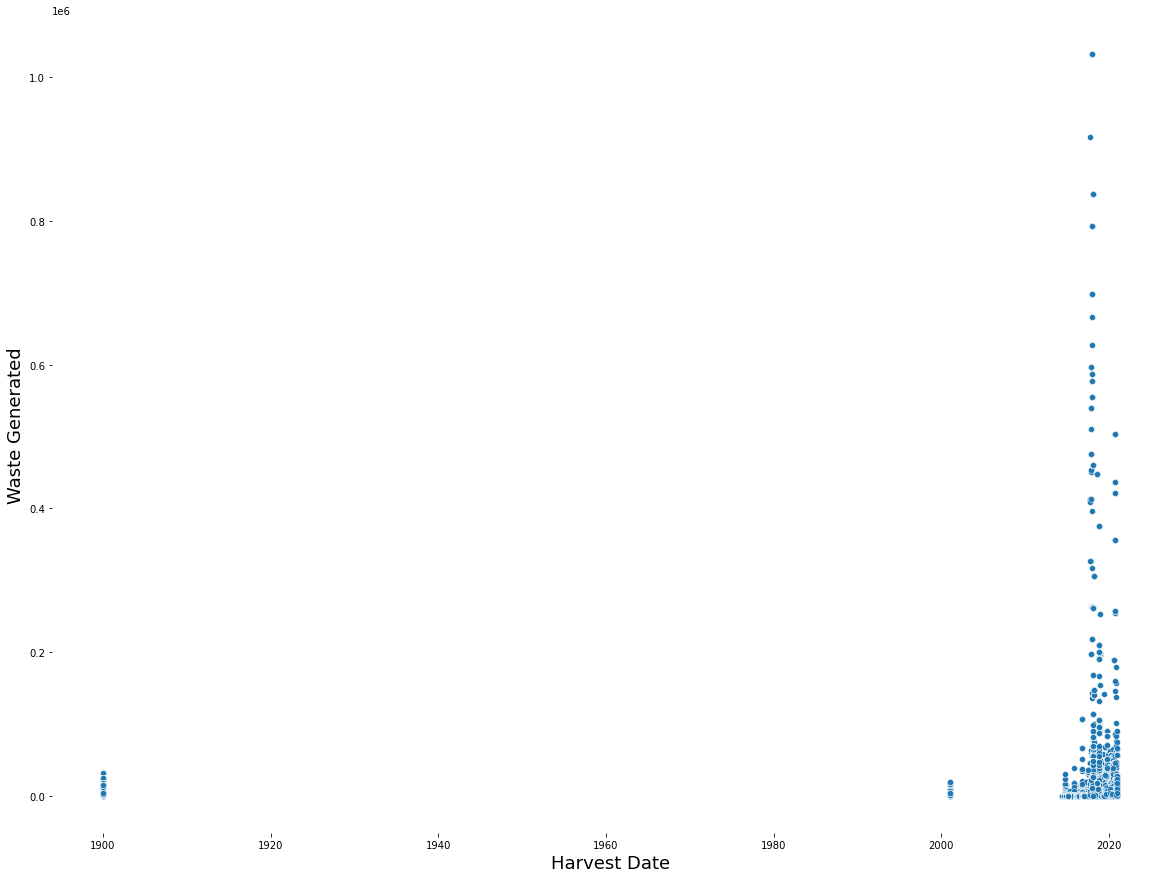

In [36]:
fig, scatter = plt.subplots(figsize = (20,15))
scatter = sns.scatterplot(data = wasted_harvested_df, x = 'harvested_at', y = "waste");
scatter.set_xlabel('Harvest Date', fontsize = 18);
scatter.set_ylabel('Waste Generated', fontsize = 18);
sns.despine(left=True, right=True, top=True, bottom=True)

Find the number of rows where the harvested at date is before 2018

In [14]:
bad_harvest_date_len = len(wasted_harvested_df[(wasted_harvested_df.waste > 0) & (wasted_harvested_df.harvested_at.dt.year < 2018)].index)
bad_harvest_date_len

669023

88% of records have a bad harvested at date so we need to find an alternative date to use

In [15]:
(bad_harvest_date_len / len(wasted_harvested_df.index))*100

87.65036958623635

The updated at date is the last time the recorded was updated.  The problem with using the updated at date is that the data may not updated in real time and the date may not reflect the day the waste was generated.

In [16]:
wasted_harvested_df['update_date'] = wasted_harvested_df.updated_at.dt.date

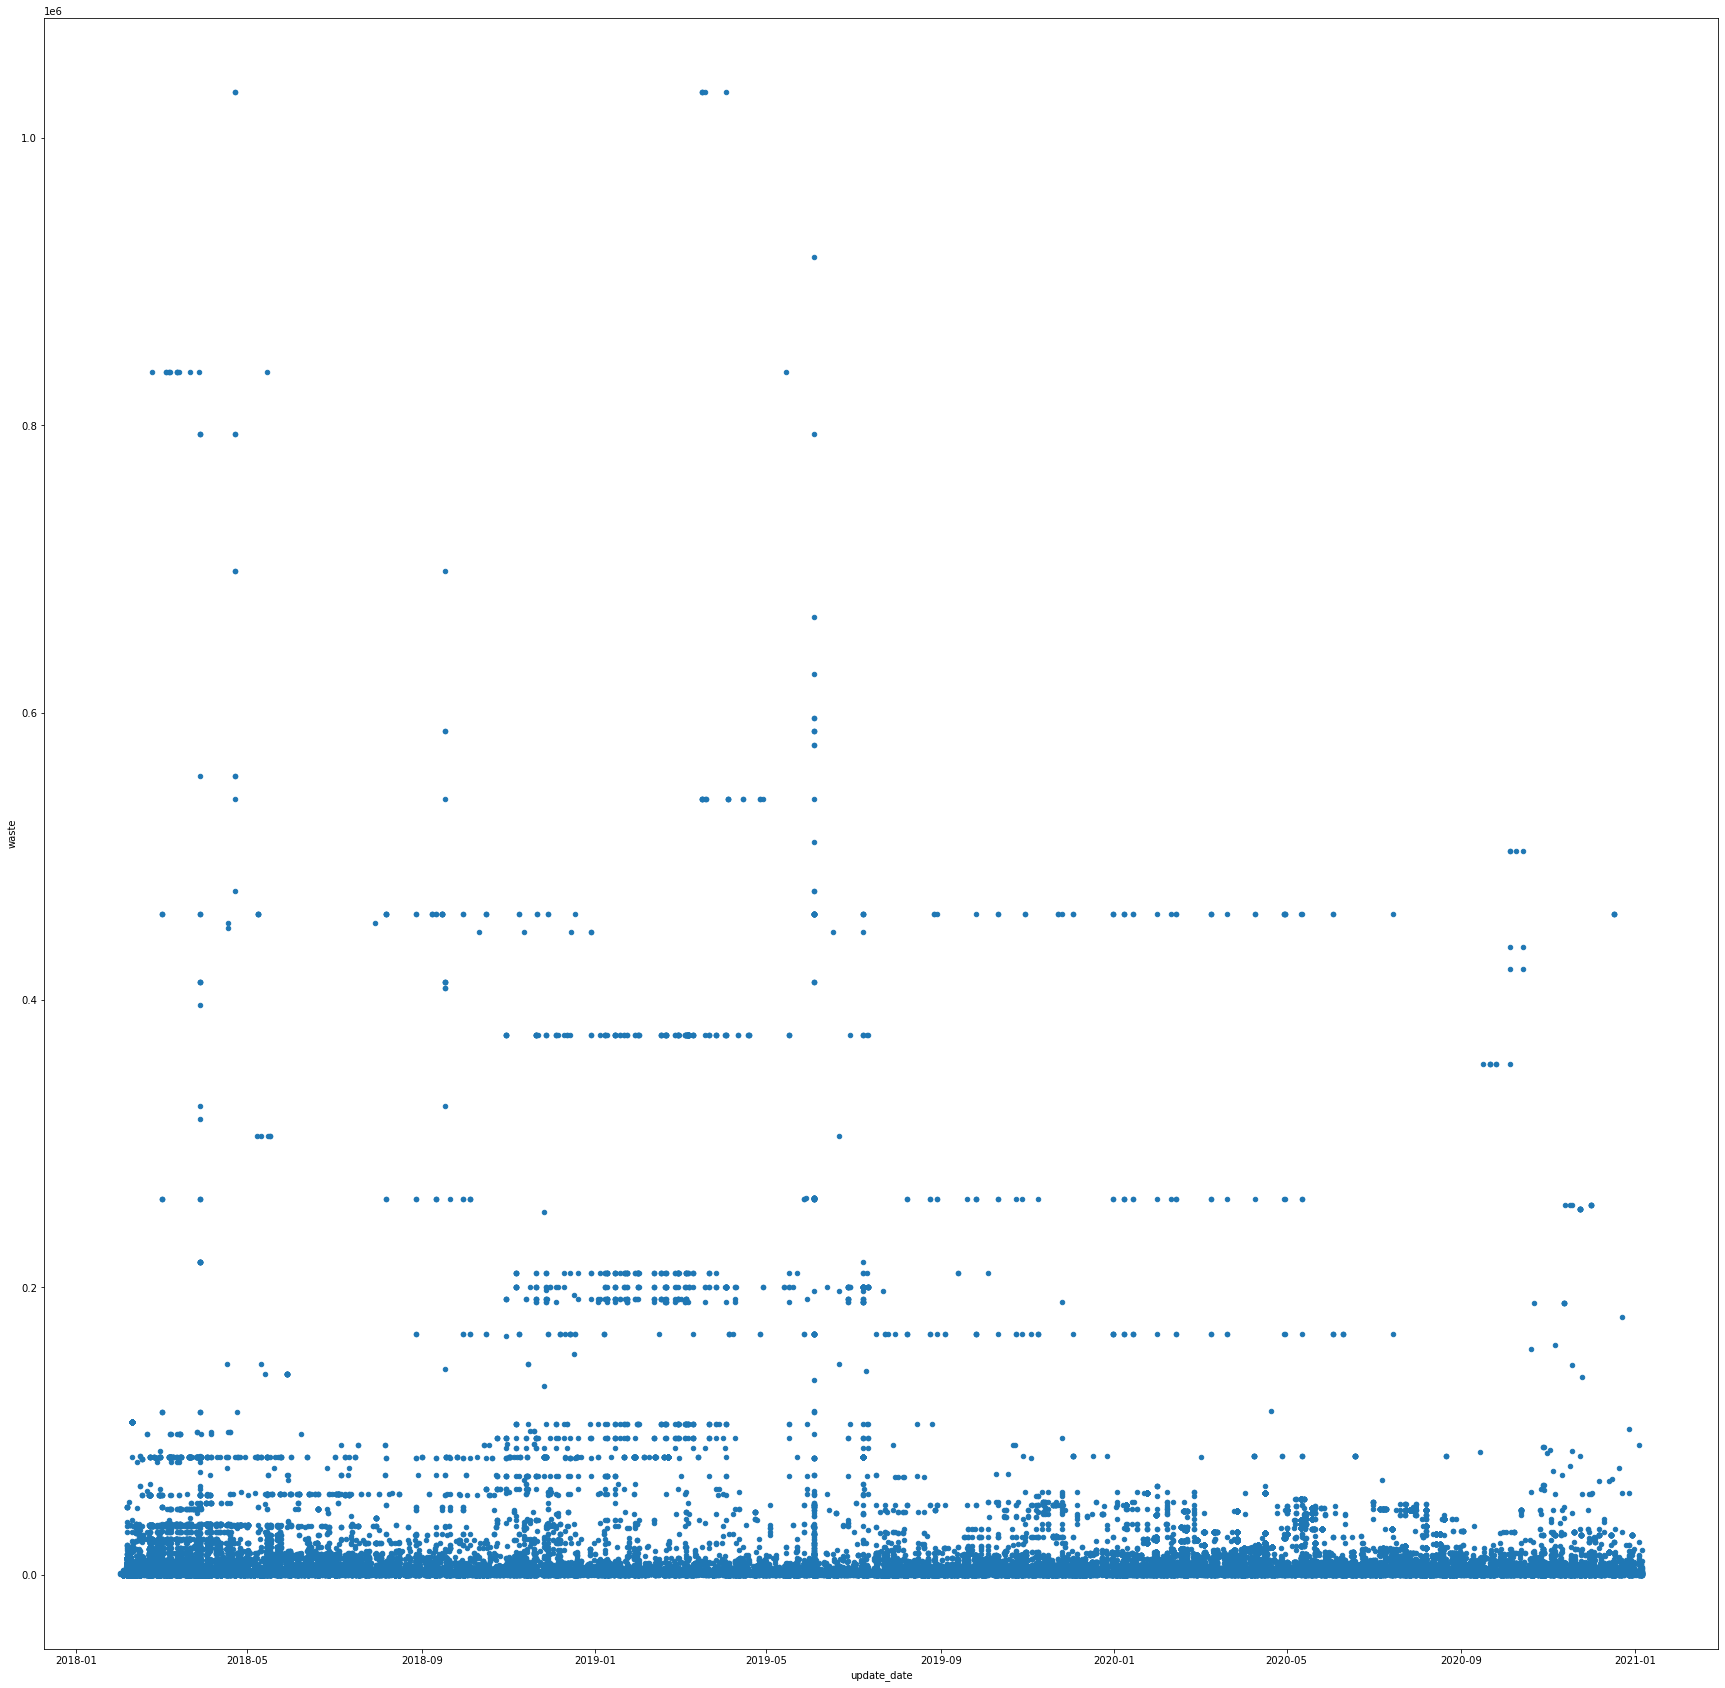

In [17]:
wasted_harvested_df.plot.scatter(x = 'update_date', y = 'waste', figsize = (30,30));

Group the data by producer and date

In [18]:
waste_by_producer = wasted_harvested_df.groupby(['mme_id', 'update_date']).agg({'waste': 'sum'})

In [19]:
waste_by_producer.head(20)

waste
mme_id      update_date               
WAWA1.MM100 2019-07-08   415100.000000
            2019-07-28      759.500000
            2019-08-14      329.299988
            2019-08-19      548.940002
            2019-11-21      500.000000
WAWA1.MM101 2018-02-22    86063.687500
            2018-03-14      965.000000
            2018-03-23   163334.734375
            2018-04-19    22190.000000
            2018-04-24     1390.000000
            2018-04-25    81667.367188
            2018-04-26      965.000000
            2018-05-15     4500.000000
            2018-09-05     8033.200195
            2019-07-29     1065.000000
            2020-01-17     3995.350098
            2020-03-27     9792.000000
            2020-04-03     4896.000000
            2020-07-17      861.000000
            2020-12-11     4460.000000

In [20]:
waste_by_producer.tail(20)

waste
mme_id     update_date              
WAWA1.MMZW 2020-01-23    1746.329956
           2020-01-30    5243.529785
           2020-12-01    9128.000000
WAWA1.MMZX 2020-01-29   10487.059570
WAWA1.MMZY 2018-08-30   23580.000000
           2018-10-10   86493.726562
           2019-03-04   59175.160156
           2020-01-13    2399.070068
           2020-01-24   10931.570312
           2020-03-24   14688.000000
           2020-12-01    9128.000000
WAWA1.MMZZ 2018-03-01   12312.000000
           2018-03-27   42220.000000
           2018-05-15   46580.000000
           2018-06-22   14633.400391
           2018-07-13    2015.829956
           2020-02-11    7457.959961
           2020-03-13       4.600000
           2020-04-13    4000.000000
           2020-11-19     952.919983

# Destroyed Waste
Oddly there is no waste when a product is destroyed

In [21]:
batches_df[(batches_df.plant_stage == 'destroyed') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight


# Growing Waste
Waste generated during growing

In [22]:
growing_waste_df = batches_df[(batches_df.plant_stage == 'growing') & (batches_df.waste > 0)].copy()

In [23]:
growing_waste_df['update_date'] = growing_waste_df.updated_at.dt.date
growing_waste_df = growing_waste_df.groupby(['mme_id', 'update_date']).agg({'waste': 'sum'})

In [24]:
growing_waste_df.head(20)

waste
mme_id      update_date         
WAWA1.MM101 2018-08-06   43400.0
            2019-05-09   33560.0
WAWA1.MM102 2018-08-18   43400.0
WAWA1.MM109 2018-08-15   43400.0
WAWA1.MM10A 2018-08-07   43400.0
            2019-04-19   16780.0
            2019-05-24   50340.0
WAWA1.MM10C 2018-08-14   43400.0
WAWA1.MM10G 2018-08-14   43400.0
WAWA1.MM10J 2019-01-17   38898.0
WAWA1.MM10N 2019-01-25   45800.0
WAWA1.MM111 2018-08-15   43400.0
WAWA1.MM117 2018-08-04   43400.0
WAWA1.MM11A 2018-08-06   43400.0
WAWA1.MM11C 2018-08-18   43400.0
WAWA1.MM11D 2019-01-09   45800.0
            2019-04-17   35400.0
WAWA1.MM11G 2018-08-27   35400.0
WAWA1.MM11J 2018-08-07   43400.0
WAWA1.MM11M 2018-08-15   43400.0

In [25]:
growing_waste_df.tail(20)

waste
mme_id     update_date              
WAWA1.MMXX 2019-01-17   38898.000000
           2019-02-01   38898.000000
WAWA1.MMXZ 2018-08-16   43400.000000
WAWA1.MMY0 2019-07-27    9214.000000
           2019-10-04    9214.000000
WAWA1.MMY1 2018-11-30   22900.000000
WAWA1.MMY6 2018-10-01     140.000000
WAWA1.MMY7 2018-10-31     140.000000
           2019-01-23   77796.000000
           2019-02-22   38898.000000
WAWA1.MMZ3 2018-08-14   43400.000000
WAWA1.MMZ6 2019-07-03     782.340027
WAWA1.MMZA 2018-08-15   43400.000000
WAWA1.MMZB 2018-08-16   43400.000000
           2018-08-29   86800.000000
WAWA1.MMZE 2019-06-04    8688.000000
WAWA1.MMZM 2018-08-22   43400.000000
WAWA1.MMZN 2019-02-16   38898.000000
WAWA1.MMZO 2019-07-01   35400.000000
WAWA1.MMZS 2018-08-20   43400.000000

# Flower Waste

In [26]:
wasted_flower_df = batches_df[(batches_df.plant_stage == 'flower') & (batches_df.waste > 0)].copy()
wasted_flower_df['update_date'] = wasted_flower_df.updated_at.dt.date
wasted_flower_df = wasted_flower_df.groupby(['mme_id', 'update_date']).agg({'waste': 'sum'})

In [28]:
wasted_flower_df.head()

,,waste
mme_id,update_date,
WAWA1.MM19A,2019-07-21,43.0
WAWA1.MMUT,2019-05-07,102.0
WAWA1.MMVQ,2019-04-24,102.0


# Seedling Waste

In [29]:
seedling_waste_df = batches_df[(batches_df.plant_stage == 'seedling') & (batches_df.waste > 0)].copy()
seedling_waste_df['update_date'] = seedling_waste_df.updated_at.dt.date
seedling_waste_df = seedling_waste_df.groupby(['mme_id', 'update_date']).agg({'waste': 'sum'})

In [30]:
seedling_waste_df.head(20)

waste
mme_id      update_date               
WAWA1.MM100 2019-06-04    83785.593750
            2019-07-08     3136.930176
            2019-07-09      325.690002
            2019-08-15    14468.919922
            2019-11-21      700.000000
WAWA1.MM101 2018-03-23     6000.000000
            2018-03-29    50024.000000
            2018-04-06    62650.621094
            2018-04-19    79373.000000
            2018-04-24     9497.000000
            2018-04-25     4179.160156
            2018-04-26      930.000000
            2018-04-27    33280.000000
            2018-05-02   718670.000000
            2018-05-15     9756.000000
            2018-05-17    19512.000000
            2018-05-22   149453.718750
            2018-05-24      550.000000
            2018-05-29    29627.548828
            2018-06-04    19582.000000

In [31]:
seedling_waste_df.tail(20)

waste
mme_id     update_date              
WAWA1.MMZZ 2019-04-08   3.352435e+04
           2019-04-09   6.757687e+04
           2019-04-19   3.264906e+05
           2019-04-25   6.299140e+05
           2019-04-30   5.301000e+04
           2019-05-03   5.483000e+04
           2019-05-09   2.260900e+04
           2019-05-10   2.649330e+03
           2019-05-24   8.955200e+04
           2019-06-05   2.115000e+03
           2019-06-06   8.303200e+04
           2019-06-19   2.940000e+03
           2019-06-21   2.830805e+06
           2019-07-02   2.946000e+04
           2019-07-16   1.202299e+06
           2019-07-30   2.393000e+04
           2019-08-06   8.910362e+05
           2019-11-21   8.960000e+03
           2019-12-18   4.780000e+03
           2020-04-07   1.632700e+05

# Clone Waste
There is no clone waste

In [32]:
batches_df[(batches_df.plant_stage == 'clone') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight


# Packaged Product Waste
There is no packaged prodcut waste

In [33]:
batches_df[(batches_df.plant_stage == 'packaged') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight


# Transferred Waste
There is no transferred product waste

In [34]:
batches_df[(batches_df.plant_stage == 'transferred') & (batches_df.waste > 0)]

,global_id,created_at,updated_at,mme_id,user_id,external_id,uom,harvested_at,batch_created_at,num_plants,status,strain_id,is_parent_batch,is_child_batch,type,harvest_stage,qty_packaged_flower,qty_packaged_by_product,packaged_completed_at,area_id,origin,plant_stage,deleted_at,flower_dry_weight,waste,other_dry_weight,harvested_end_at,flower_wet_weight,other_wet_weight
